# Precheck

With this template, you can find errors in your strategy before submitting.

1) Click menu "Kernel" -> "Restart Kernel and Run All Cells…"

2) Compare the strategy statistics with the results in strategy.ipynb

In [1]:
import xarray as xr
import qnt.ta as qnta
import qnt.data as qndata
import qnt.output as qnout
import qnt.stats as qns

data = qndata.stocks.load_spx_data(min_date="2005-01-01")
contest_type = "stocks_s&p500"

def calculate_weights(data):
    close = data.sel(field="close")
    is_liquid = data.sel(field="is_liquid")
    sma_slow = qnta.sma(close, 200)
    sma_fast = qnta.sma(close, 20)
    # 1 buy; -1 sell; 0 no trade
    weights = xr.where(sma_slow < sma_fast, 1, 0)
    weights = weights * is_liquid
    return weights

weights = calculate_weights(data)
weights = qnout.clean(weights, data, contest_type)

100% (367973 of 367973) |################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (79197 of 79197) |##################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (12923648 of 12923648) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 1/13 1s


100% (12923652 of 12923652) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 2/13 2s


100% (12923648 of 12923648) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 3/13 2s


100% (12923652 of 12923652) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 4/13 3s


100% (12923624 of 12923624) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 5/13 4s


100% (12923544 of 12923544) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 6/13 5s


100% (12923544 of 12923544) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 7/13 5s


100% (12877392 of 12877392) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 8/13 6s


100% (12923544 of 12923544) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 9/13 7s


100% (12877392 of 12877392) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 10/13 8s


100% (12923544 of 12923544) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 11/13 9s


100% (12923544 of 12923544) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 12/13 10s


100% (11633336 of 11633336) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 13/13 11s
Data loaded 11s
Output cleaning...
fix uniq
ffill if the current price is None...
Check liquidity...
Ok.
Check missed dates...
Ok.
Normalization...
Output cleaning is complete.


field,equity,relative_return,volatility,underwater,max_drawdown,sharpe_ratio,mean_return,bias,instruments,avg_turnover,avg_holding_time
time,,,,,,,,,,,
2025-01-06,6.236663,-0.002046,0.181684,-0.062185,-0.569222,0.557129,0.101221,1.0,512.0,0.046662,47.297257
2025-01-07,6.205376,-0.005017,0.181669,-0.066889,-0.569222,0.555447,0.100907,1.0,512.0,0.046659,47.306119
2025-01-08,6.230614,0.004067,0.181652,-0.063094,-0.569222,0.556673,0.101121,1.0,512.0,0.046661,47.329932
2025-01-10,6.126489,-0.016712,0.181676,-0.078751,-0.569222,0.551103,0.100122,1.0,512.0,0.046656,47.344807
2025-01-13,6.160494,0.005550,0.181660,-0.073638,-0.569222,0.552793,0.100421,1.0,513.0,0.046659,48.054191


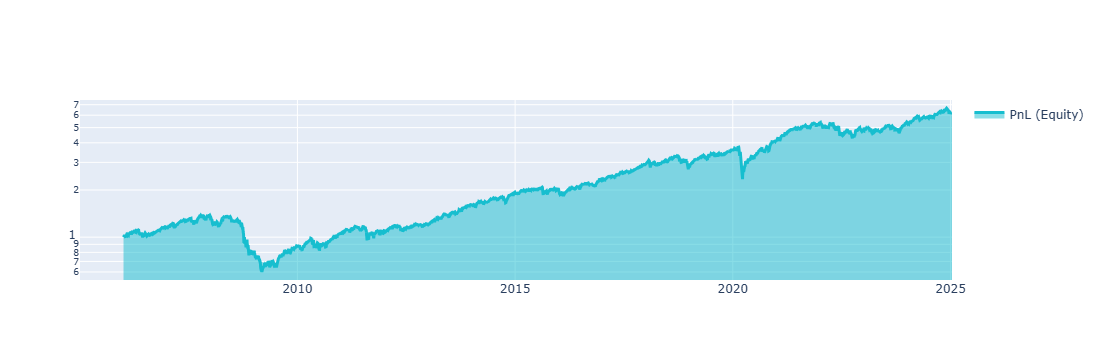

Check liquidity...
Ok.
Check missed dates...
Ok.
Check the sharpe ratio...
Period: 2006-01-01 - 2025-01-13
Sharpe Ratio = 0.5527932712817463


ERROR! The Sharpe Ratio is too low. 0.5527932712817463 < 0.7
Improve the strategy and make sure that the in-sample Sharpe Ratio more than 0.7.


Write output: /root/fractions.nc.gz


In [3]:
import xarray as xr
import qnt.ta as qnta
import qnt.data as qndata
import qnt.output as qnout
import qnt.stats as qns

# calc stats
stats = qns.calc_stat(data, weights.sel(time=slice("2006-01-01", None)))
display(stats.to_pandas().tail())

# graph
performance = stats.to_pandas()["equity"]
import qnt.graph as qngraph

qngraph.make_plot_filled(performance.index, performance, name="PnL (Equity)", type="log")

weights = weights.sel(time=slice("2006-01-01",None))

qnout.check(weights, data, contest_type, check_correlation=False)
qnout.write(weights) # to participate in the competition